# Exe_25 - RDKit

In [3]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Descriptors
from rdkit.Chem import AllChem
from rdkit import DataStructs
import numpy as np
import pandas as pd
import seaborn as sns
from rdkit.Chem.Descriptors import MolLogP
from tqdm.auto import tqdm
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
#from umap import UMAP

In [4]:
df = pd.read_csv("curated-solubility-dataset.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'curated-solubility-dataset.csv'

In [ ]:
df

,ID,Name,InChI,InChIKey,SMILES,Solubility,SD,Ocurrences,Group,MolWt,...,NumRotatableBonds,NumValenceElectrons,NumAromaticRings,NumSaturatedRings,NumAliphaticRings,RingCount,TPSA,LabuteASA,BalabanJ,BertzCT
0,A-3,"N,N,N-trimethyloctadecan-1-aminium bromide",InChI=1S/C21H46N.BrH/c1-5-6-7-8-9-10-11-12-13-...,SZEMGTQCPRNXEG-UHFFFAOYSA-M,[Br-].CCCCCCCCCCCCCCCCCC[N+](C)(C)C,-3.616127,0.000000,1,G1,392.510,...,17.0,142.0,0.0,0.0,0.0,0.0,0.00,158.520601,0.000000e+00,210.377334
1,A-4,Benzo[cd]indol-2(1H)-one,InChI=1S/C11H7NO/c13-11-8-5-1-3-7-4-2-6-9(12-1...,GPYLCFQEKPUWLD-UHFFFAOYSA-N,O=C1Nc2cccc3cccc1c23,-3.254767,0.000000,1,G1,169.183,...,0.0,62.0,2.0,0.0,1.0,3.0,29.10,75.183563,2.582996e+00,511.229248
2,A-5,4-chlorobenzaldehyde,InChI=1S/C7H5ClO/c8-7-3-1-6(5-9)2-4-7/h1-5H,AVPYQKSLYISFPO-UHFFFAOYSA-N,Clc1ccc(C=O)cc1,-2.177078,0.000000,1,G1,140.569,...,1.0,46.0,1.0,0.0,0.0,1.0,17.07,58.261134,3.009782e+00,202.661065
3,A-8,"zinc bis[2-hydroxy-3,5-bis(1-phenylethyl)benzo...",InChI=1S/2C23H22O3.Zn/c2*1-15(17-9-5-3-6-10-17...,XTUPUYCJWKHGSW-UHFFFAOYSA-L,[Zn++].CC(c1ccccc1)c2cc(C(C)c3ccccc3)c(O)c(c2)...,-3.924409,0.000000,1,G1,756.226,...,10.0,264.0,6.0,0.0,0.0,6.0,120.72,323.755434,2.322963e-07,1964.648666
4,A-9,4-({4-[bis(oxiran-2-ylmethyl)amino]phenyl}meth...,InChI=1S/C25H30N2O4/c1-5-20(26(10-22-14-28-22)...,FAUAZXVRLVIARB-UHFFFAOYSA-N,C1OC1CN(CC2CO2)c3ccc(Cc4ccc(cc4)N(CC5CO5)CC6CO...,-4.662065,0.000000,1,G1,422.525,...,12.0,164.0,2.0,4.0,4.0,6.0,56.60,183.183268,1.084427e+00,769.899934
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9977,I-84,tetracaine,InChI=1S/C15H24N2O2/c1-4-5-10-16-14-8-6-13(7-9...,GKCBAIGFKIBETG-UHFFFAOYSA-N,C(c1ccc(cc1)NCCCC)(=O)OCCN(C)C,-3.010000,0.000000,1,G1,264.369,...,8.0,106.0,1.0,0.0,0.0,1.0,41.57,115.300645,2.394548e+00,374.236893
9978,I-85,tetracycline,InChI=1S/C22H24N2O8/c1-21(31)8-5-4-6-11(25)12(...,OFVLGDICTFRJMM-WESIUVDSSA-N,OC1=C(C(C2=C(O)[C@@](C(C(C(N)=O)=C(O)[C@H]3N(C...,-2.930000,0.000000,1,G1,444.440,...,2.0,170.0,1.0,0.0,3.0,4.0,181.62,182.429237,2.047922e+00,1148.584975
9979,I-86,thymol,InChI=1S/C10H14O/c1-7(2)9-5-4-8(3)6-10(9)11/h4...,MGSRCZKZVOBKFT-UHFFFAOYSA-N,c1(cc(ccc1C(C)C)C)O,-2.190000,0.019222,3,G5,150.221,...,1.0,60.0,1.0,0.0,0.0,1.0,20.23,67.685405,3.092720e+00,251.049732
9980,I-93,verapamil,"InChI=1S/C27H38N2O4/c1-20(2)27(19-28,22-10-12-...",SGTNSNPWRIOYBX-UHFFFAOYSA-N,COc1ccc(CCN(C)CCCC(C#N)(C(C)C)c2ccc(OC)c(OC)c2...,-3.980000,0.000000,1,G1,454.611,...,13.0,180.0,2.0,0.0,0.0,2.0,63.95,198.569223,2.023333e+00,938.203977


- G1 - occurs once in the dataset
- G2 - occurs twice in the dataset, SD > 0.5
- G3 - occurs twice in the dataset, SD <= 0.5
- G4 - occurs three or more times in the dataset, SD > 0.5
- G5 - occurs three or more times in the dataset, SD <= 0.5

In [ ]:
df.Group.value_counts()

G1    7746
G3    1182
G5     636
G2     235
G4     183
Name: Group, dtype: int64

In [ ]:
df.Group.value_counts(normalize=True)

G1    0.775997
G3    0.118413
G5    0.063715
G2    0.023542
G4    0.018333
Name: Group, dtype: float64

<AxesSubplot: >

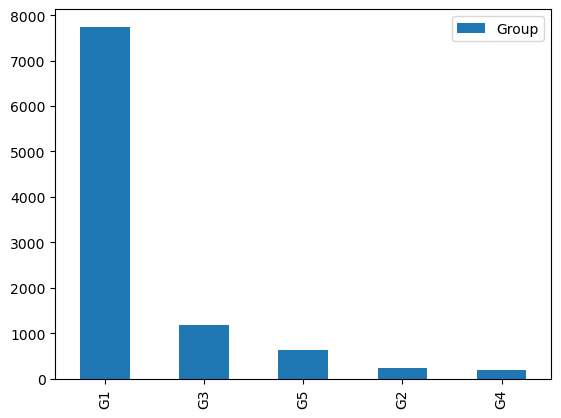

In [ ]:
df.Group.value_counts().to_frame().plot(kind="bar")

In [ ]:
df_ok = df[(df["Group"] == 'G3') | (df["Group"]=='G5')].copy()
df_ok.shape

(1818, 26)

In [ ]:
df_ok.head()

,ID,Name,InChI,InChIKey,SMILES,Solubility,SD,Ocurrences,Group,MolWt,...,NumRotatableBonds,NumValenceElectrons,NumAromaticRings,NumSaturatedRings,NumAliphaticRings,RingCount,TPSA,LabuteASA,BalabanJ,BertzCT
8,A-14,bis(4-fluorophenyl)methanone,InChI=1S/C13H8F2O/c14-11-5-1-9(2-6-11)13(16)10...,LSQARZALBDFYQZ-UHFFFAOYSA-N,Fc1ccc(cc1)C(=O)c2ccc(F)cc2,-4.396652,0.431513,2,G3,218.202,...,2.0,80.0,2.0,0.0,0.0,2.0,17.07,91.346032,2.315628e+00,452.960733
9,A-15,1-[2-(benzoyloxy)propoxy]propan-2-yl benzoate ...,InChI=1S/C20H22O5/c21-19(17-9-3-1-4-10-17)24-1...,BYQDGAVOOHIJQS-UHFFFAOYSA-N,O=C(OCCCOCCCOC(=O)c1ccccc1)c2ccccc2,-4.595503,0.118551,2,G3,342.391,...,10.0,132.0,2.0,0.0,0.0,2.0,61.83,147.071714,1.447050e+00,582.150793
12,A-19,"2,3-dimethylphenol; 2,4-dimethylphenol; 2,5-di...",InChI=1S/6C8H10O/c1-6-3-7(2)5-8(9)4-6;1-6-3-4-...,YJZHZFOWHRKQHS-UHFFFAOYSA-N,Cc1ccc(O)c(C)c1.Cc2ccc(C)c(O)c2.Cc3cc(C)cc(O)c...,-1.980310,0.155859,4,G5,733.002,...,0.0,288.0,6.0,0.0,0.0,6.0,121.38,322.890738,3.240000e-07,1804.418547
15,A-23,"(2E)-3,7-dimethylocta-2,6-dien-1-ol","InChI=1S/C10H18O/c1-9(2)5-4-6-10(3)7-8-11/h5,7...",GLZPCOQZEFWAFX-YFHOEESVSA-N,CC(C)=CCC\C(C)=C/CO,-2.320601,0.071633,4,G5,154.253,...,4.0,64.0,0.0,0.0,0.0,0.0,20.23,69.438758,3.544387e+00,150.255712
16,A-24,2-(4-chloro-2-methylphenoxy)propanoic acid,InChI=1S/C10H11ClO3/c1-6-5-8(11)3-4-9(6)14-7(2...,WNTGYJSOUMFZEP-UHFFFAOYSA-N,CC(Oc1ccc(Cl)cc1C)C(O)=O,-2.466031,0.060621,4,G5,214.648,...,3.0,76.0,1.0,0.0,0.0,1.0,46.53,87.263739,2.817665e+00,349.220389


**Plot a frequency distribution for the solubility data - df_ok - using Seaborn's displot:
Experiment with :**
- kind = "kde"
- kind = "hist"

In [ ]:
sns.set(rc={'figure.figsize': (10, 10)})
sns.set_style('whitegrid')
sns.set_context('talk')

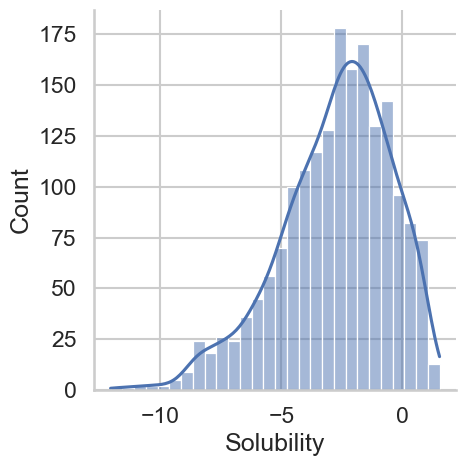

In [ ]:
sns.displot(df_ok['Solubility'], kde=True)

Let's bin the data
- &gt;200 uM 
- 30-200 uM 
- <30 uM 

In [ ]:
bins = [np.log10(x*1e-6) for x in [30,200]]
print(bins)
bins = [-100] + bins + [100]
df_ok['bin'] = pd.cut(df.Solubility,bins=bins,labels=["Low","Medium","High"])

[-4.522878745280337, -3.6989700043360187]


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

<Figure size 1000x600 with 0 Axes>

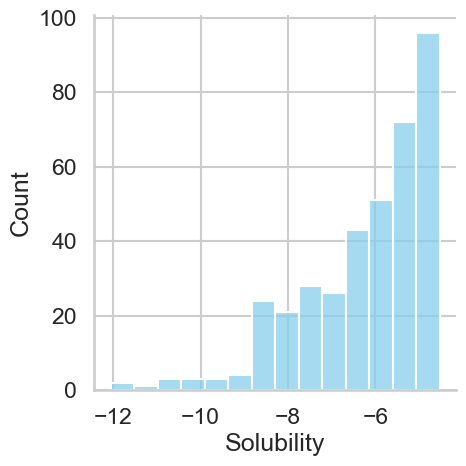

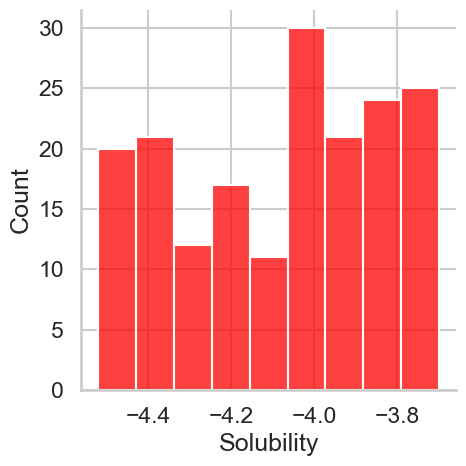

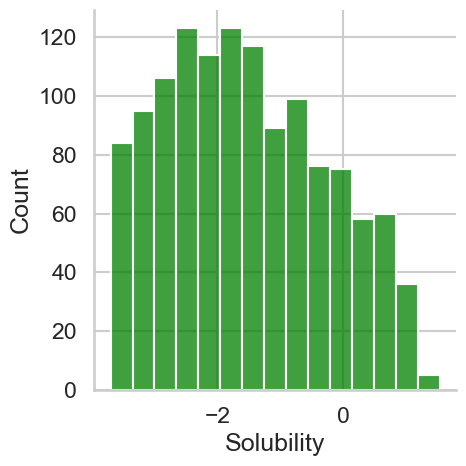

In [ ]:
fig = plt.figure(figsize=(10,6))
sns.displot( df_ok.loc[df_ok['bin'] == 'Low']['Solubility'] , color="skyblue", label="Low")
sns.displot( df_ok.loc[df_ok['bin'] == 'Medium']['Solubility'] , color="red", label="Medium");
sns.displot( df_ok.loc[df_ok['bin'] == 'High']['Solubility'] , color="green", label="High");
fig.legend(labels=["Low","Medium","High"])
plt.show()

**Use the command -sns.boxplot - to create the following graph:**

Text(0.5, 0, 'Solubility Bin')

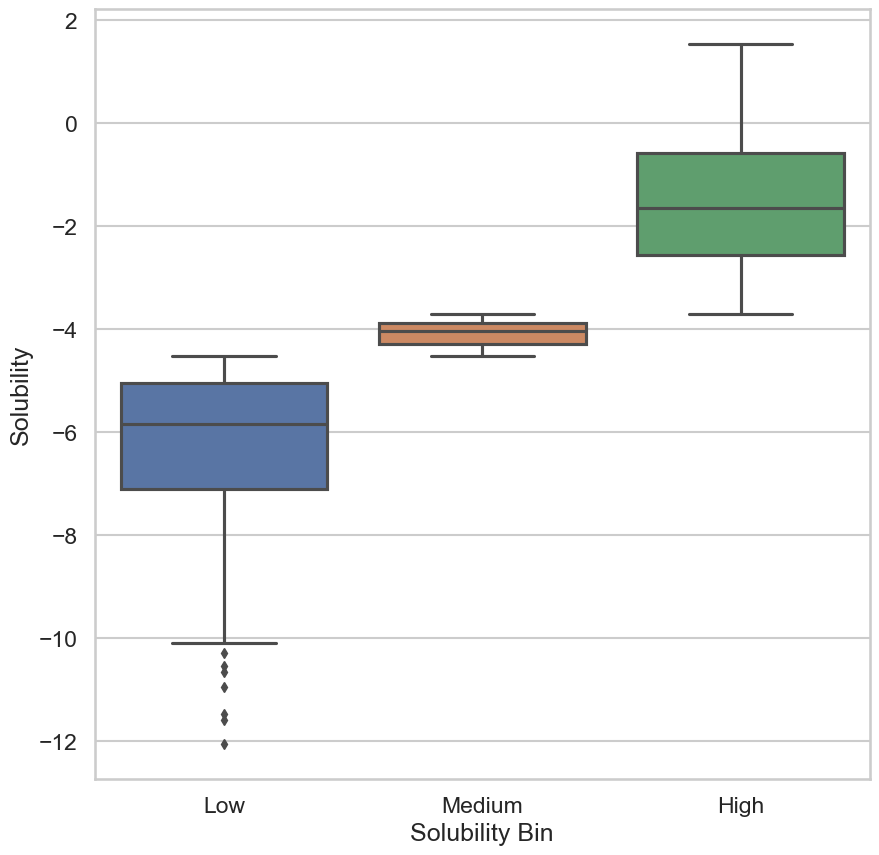

In [ ]:
ax = sns.boxplot(x='bin', y='Solubility', data =df_ok)
ax.set_xlabel("Solubility Bin")

**Divide the solubility values into high and low values. If the value in the df_ok ['bin'] column was high, then the value in the new column, df_ok ['is_sol'] would be true or false:**

In [ ]:
df_ok['is_sol'] = [x == "High" for x in df_ok.bin]
df_ok.head()

,ID,Name,InChI,InChIKey,SMILES,Solubility,SD,Ocurrences,Group,MolWt,...,NumAromaticRings,NumSaturatedRings,NumAliphaticRings,RingCount,TPSA,LabuteASA,BalabanJ,BertzCT,bin,is_sol
8,A-14,bis(4-fluorophenyl)methanone,InChI=1S/C13H8F2O/c14-11-5-1-9(2-6-11)13(16)10...,LSQARZALBDFYQZ-UHFFFAOYSA-N,Fc1ccc(cc1)C(=O)c2ccc(F)cc2,-4.396652,0.431513,2,G3,218.202,...,2.0,0.0,0.0,2.0,17.07,91.346032,2.315628e+00,452.960733,Medium,False
9,A-15,1-[2-(benzoyloxy)propoxy]propan-2-yl benzoate ...,InChI=1S/C20H22O5/c21-19(17-9-3-1-4-10-17)24-1...,BYQDGAVOOHIJQS-UHFFFAOYSA-N,O=C(OCCCOCCCOC(=O)c1ccccc1)c2ccccc2,-4.595503,0.118551,2,G3,342.391,...,2.0,0.0,0.0,2.0,61.83,147.071714,1.447050e+00,582.150793,Low,False
12,A-19,"2,3-dimethylphenol; 2,4-dimethylphenol; 2,5-di...",InChI=1S/6C8H10O/c1-6-3-7(2)5-8(9)4-6;1-6-3-4-...,YJZHZFOWHRKQHS-UHFFFAOYSA-N,Cc1ccc(O)c(C)c1.Cc2ccc(C)c(O)c2.Cc3cc(C)cc(O)c...,-1.980310,0.155859,4,G5,733.002,...,6.0,0.0,0.0,6.0,121.38,322.890738,3.240000e-07,1804.418547,High,True
15,A-23,"(2E)-3,7-dimethylocta-2,6-dien-1-ol","InChI=1S/C10H18O/c1-9(2)5-4-6-10(3)7-8-11/h5,7...",GLZPCOQZEFWAFX-YFHOEESVSA-N,CC(C)=CCC\C(C)=C/CO,-2.320601,0.071633,4,G5,154.253,...,0.0,0.0,0.0,0.0,20.23,69.438758,3.544387e+00,150.255712,High,True
16,A-24,2-(4-chloro-2-methylphenoxy)propanoic acid,InChI=1S/C10H11ClO3/c1-6-5-8(11)3-4-9(6)14-7(2...,WNTGYJSOUMFZEP-UHFFFAOYSA-N,CC(Oc1ccc(Cl)cc1C)C(O)=O,-2.466031,0.060621,4,G5,214.648,...,1.0,0.0,0.0,1.0,46.53,87.263739,2.817665e+00,349.220389,High,True


**Display the graph showing the distribution of solubility values according to the new column you calculated:**

<Figure size 1000x600 with 0 Axes>

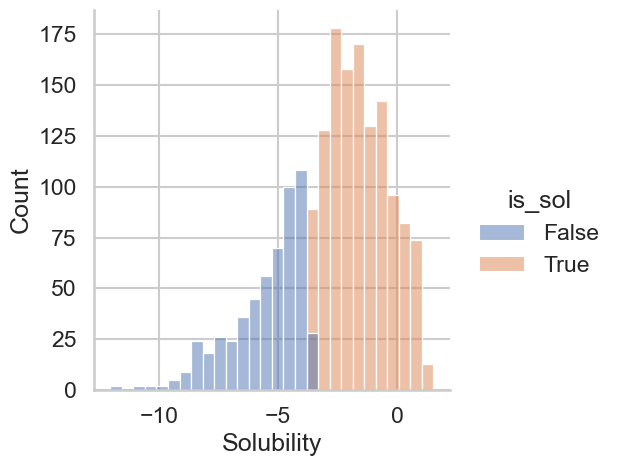

In [ ]:
fig = plt.figure(figsize=(10,6))
sns.displot( data=df_ok, x='Solubility',  hue="is_sol" , color="skyblue", label="True",kde=False)
fig.legend(labels=["True","False"])
plt.show()